In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\fichiers_csv\laptops.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Cross Validation

In [5]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [7]:
x_data = df[['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel']]

y_data = df["Price"]

Split 90/10

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

CPU_frequency

In [22]:
lr = LinearRegression()
lr.fit(x_train[["CPU_frequency"]], y_train)
print("test score:", lr.score(x_test[["CPU_frequency"]], y_test))
print("train score:", lr.score(x_train[["CPU_frequency"]], y_train))

test score: -0.06599437350393789
train score: 0.14829792099817973


In [23]:
Rcross = cross_val_score(lr, x_data[["CPU_frequency"]], y_data, cv=4)
print("mean of fold:", Rcross.mean(),'standard deviation:', Rcross.std())

mean of fold: -0.16109232388595113 standard deviation: 0.384957978666471


# Surapprentissage

split 50/50

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

<Axes: xlabel='CPU_frequency', ylabel='Price'>

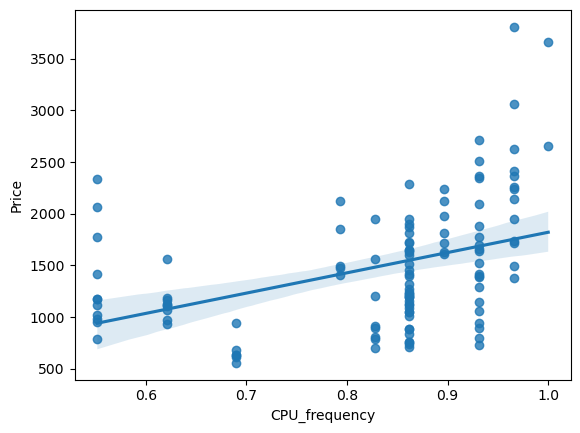

In [32]:
sns.regplot(x = x_train[['CPU_frequency']], y= y_train)

In [28]:
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

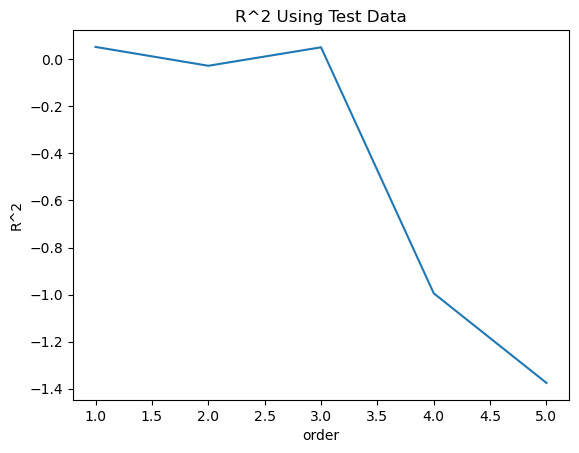

In [29]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Le score chute au degré 3

In [34]:
pr1 = PolynomialFeatures(degree=3)
x_train_pr1 = pr1.fit_transform(x_train[['CPU_frequency']])
x_test_pr1 = pr1.fit_transform(x_test[['CPU_frequency']])
lr.fit(x_train_pr1, y_train)

print("test score:", lr.score(x_test_pr1, y_test))
print("train score:", lr.score(x_train_pr1, y_train))

test score: 0.051563457925586365
train score: 0.37554067395541346


# Ridge Regression

 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category'

In [38]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [39]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:06<00:00, 156.58it/s, Test Score=0.423, Train Score=0.669]


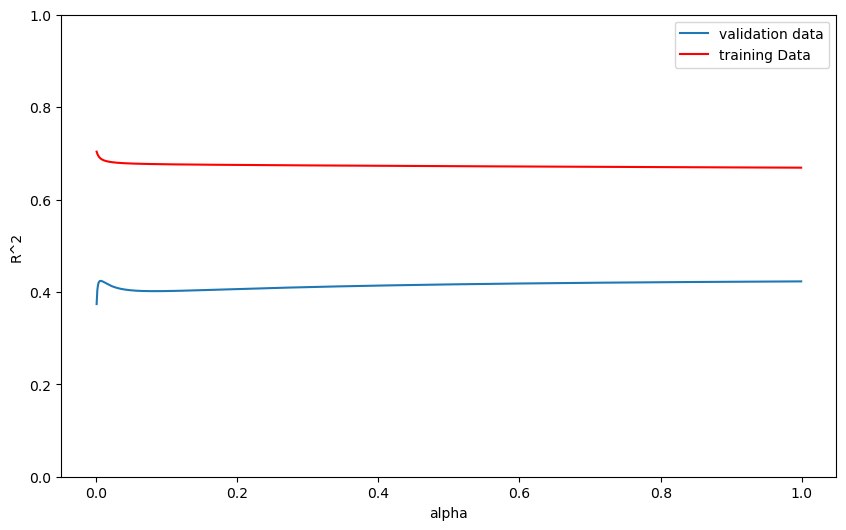

In [40]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# GridSearchCV

In [41]:
parameters1 = [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [48]:
RR =  Ridge()
Grid1 = GridSearchCV(RR,parameters1, cv=4)

In [52]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [55]:
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.300990504869182
